In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
import glob
import torch

In [3]:
from models.discriminators import ECGLSTMDiscriminator, EcgCNNDiscriminator
from models.generators import ECGLSTMGenerator, EcgCNNGenerator

In [6]:
#####LSTM DTW PLOT

os.chdir("/Users/alainamahalanabis/Documents/GAN_XAI/src/results/ecg/ECGLSTM_Normal/")
dtw_normal_files = glob.glob('epoch_50_batch_7_dtw_time*.csv')
print("files ", dtw_normal_files)
dtw_normal = []
df = pd.DataFrame()
for file in dtw_normal_files:
    print(file)
    df[file] = pd.read_csv(file, header=None)
i = 1
for col in df.columns:
    df.rename(columns={col:"run " + str(i)}, inplace=True)
    i +=1
df['epoch'] = range(1,51)
dfm_standard = df.melt('epoch', var_name='cols', value_name='DTW')
dfm_standard['experiment'] = "standard"
print("done standard")

os.chdir("/Users/alainamahalanabis/Documents/GAN_XAI/src/results/ecg/ECGLSTM_Normal_wgan/")
dtw_normal_files = glob.glob('epoch_50_batch_7_dtw_*.csv')
dtw_normal = []
df = pd.DataFrame()
for file in dtw_normal_files:
    print(file)
    df[file] = pd.read_csv(file, header=None)
i = 1
for col in df.columns:
    df.rename(columns={col:"run " + str(i)}, inplace=True)
    i +=1
df['epoch'] = range(1,51)
dfm_wgan = df.melt('epoch', var_name='cols', value_name='DTW')
dfm_wgan['experiment'] = "xai_wgan"
print("done wgan")


dfm = pd.concat([dfm_standard, dfm_wgan], axis=0)

files  ['epoch_50_batch_7_dtw_time1650422347.9604025.csv', 'epoch_50_batch_7_dtw_time1650421405.1123447.csv', 'epoch_50_batch_7_dtw_time1650422165.0521035.csv', 'epoch_50_batch_7_dtw_time1650421365.8085701.csv', 'epoch_50_batch_7_dtw_time1650422371.1719706.csv', 'epoch_50_batch_7_dtw_time1650422303.0106437.csv', 'epoch_50_batch_7_dtw_time1650421796.9006622.csv', 'epoch_50_batch_7_dtw_time1650421322.870542.csv', 'epoch_50_batch_7_dtw_time1650421353.628183.csv', 'epoch_50_batch_7_dtw_time1650421313.4737432.csv']
epoch_50_batch_7_dtw_time1650422347.9604025.csv
epoch_50_batch_7_dtw_time1650421405.1123447.csv
epoch_50_batch_7_dtw_time1650422165.0521035.csv
epoch_50_batch_7_dtw_time1650421365.8085701.csv
epoch_50_batch_7_dtw_time1650422371.1719706.csv
epoch_50_batch_7_dtw_time1650422303.0106437.csv
epoch_50_batch_7_dtw_time1650421796.9006622.csv
epoch_50_batch_7_dtw_time1650421322.870542.csv
epoch_50_batch_7_dtw_time1650421353.628183.csv
epoch_50_batch_7_dtw_time1650421313.4737432.csv
done s

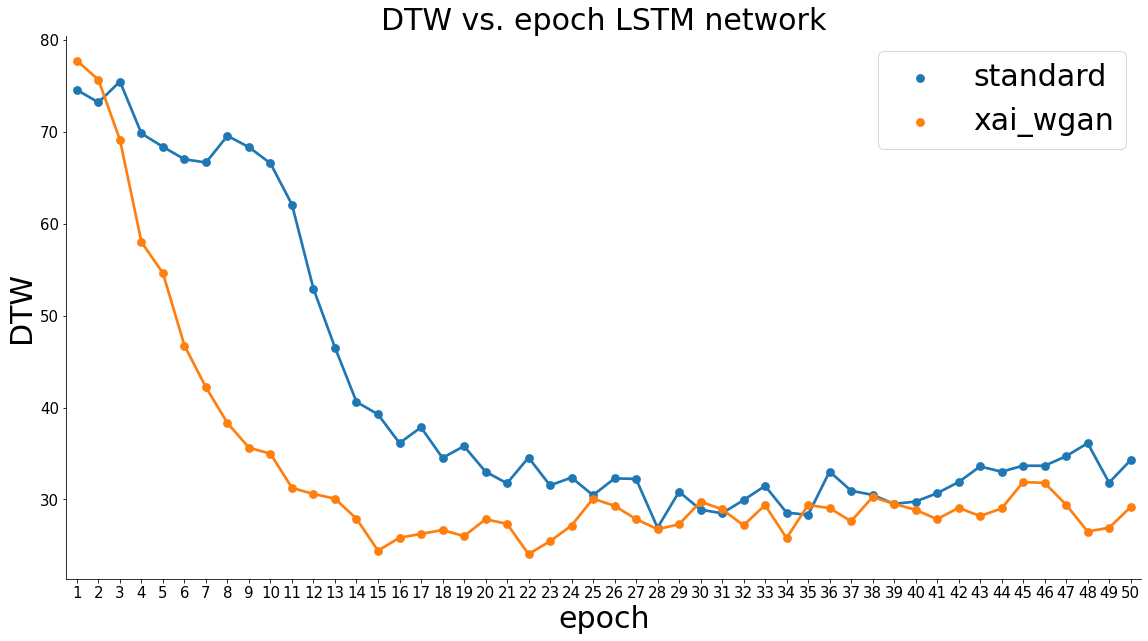

In [7]:
#sns.set_style("whitegrid")
g=sns.catplot(x="epoch", y="DTW", hue='experiment', legend = False, data=dfm, kind='point',
              ci=None, height=8.27, aspect=15.7/8.27)
g.ax.set_xlabel(xlabel = "epoch", fontsize=30)
g.ax.set_ylabel(ylabel = "DTW", fontsize=30)
g.ax.legend(fontsize=30)
g.ax.set_title("DTW vs. epoch LSTM network", fontsize=30)
g.ax.tick_params(labelsize=15)

In [7]:
os.chdir("/Users/alainamahalanabis/Documents/GAN_XAI/src/figures/")
g.figure.set_size_inches(20, 20)
g.figure.savefig('DTW_LSTM.png')

In [8]:
#####LSTM PEARSON CORRELATION PLOT

os.chdir("/Users/alainamahalanabis/Documents/GAN_XAI/src/results/ecg/ECGLSTM_Normal")
dtw_normal_files = glob.glob('epoch_50_batch_7_pearson_*.csv')
dtw_normal = []
df = pd.DataFrame()
for file in dtw_normal_files:
    print(file)
    df[file] = pd.read_csv(file, header=None)
i = 1
for col in df.columns:
    df.rename(columns={col:"run " + str(i)}, inplace=True)
    i +=1
df['epoch'] = range(1,51)
dfm_standard = df.melt('epoch', var_name='cols', value_name='RMSE')
dfm_standard['experiment'] = "standard"

os.chdir("/Users/alainamahalanabis/Documents/GAN_XAI/src/results/ecg/ECGLSTM_Normal_wgan")
dtw_normal_files = glob.glob('epoch_50_batch_7_pearson_*.csv')
dtw_normal = []
df = pd.DataFrame()
for file in dtw_normal_files:
    print(file)
    df[file] = pd.read_csv(file, header=None)
i = 1
for col in df.columns:
    df.rename(columns={col:"run " + str(i)}, inplace=True)
    i +=1
df['epoch'] = range(1,51)
dfm_wgan = df.melt('epoch', var_name='cols', value_name='RMSE')
dfm_wgan['experiment'] = "xai_wgan"

epoch_50_batch_7_pearson_time1650422303.1670554.csv
epoch_50_batch_7_pearson_time1650421353.731698.csv
epoch_50_batch_7_pearson_time1650421405.2723606.csv
epoch_50_batch_7_pearson_time1650421313.5757802.csv
epoch_50_batch_7_pearson_time1650422165.2368312.csv
epoch_50_batch_7_pearson_time1650421797.102201.csv
epoch_50_batch_7_pearson_time1650421322.971904.csv
epoch_50_batch_7_pearson_time1650422348.1264143.csv
epoch_50_batch_7_pearson_time1650421365.9235349.csv
epoch_50_batch_7_pearson_time1650422371.3224375.csv
epoch_50_batch_7_pearson_time1650432165.6528714.csv
epoch_50_batch_7_pearson_time1650434223.357115.csv
epoch_50_batch_7_pearson_time1650432170.7956746.csv
epoch_50_batch_7_pearson_time1650433685.6417677.csv
epoch_50_batch_7_pearson_time1650433535.2486365.csv
epoch_50_batch_7_pearson_time1650433284.4241302.csv
epoch_50_batch_7_pearson_time1650431392.260778.csv
epoch_50_batch_7_pearson_time1650432323.829157.csv
epoch_50_batch_7_pearson_time1650431309.0603602.csv
epoch_50_batch_7_p

In [9]:
dfm = pd.concat([dfm_standard, dfm_wgan], axis=0)

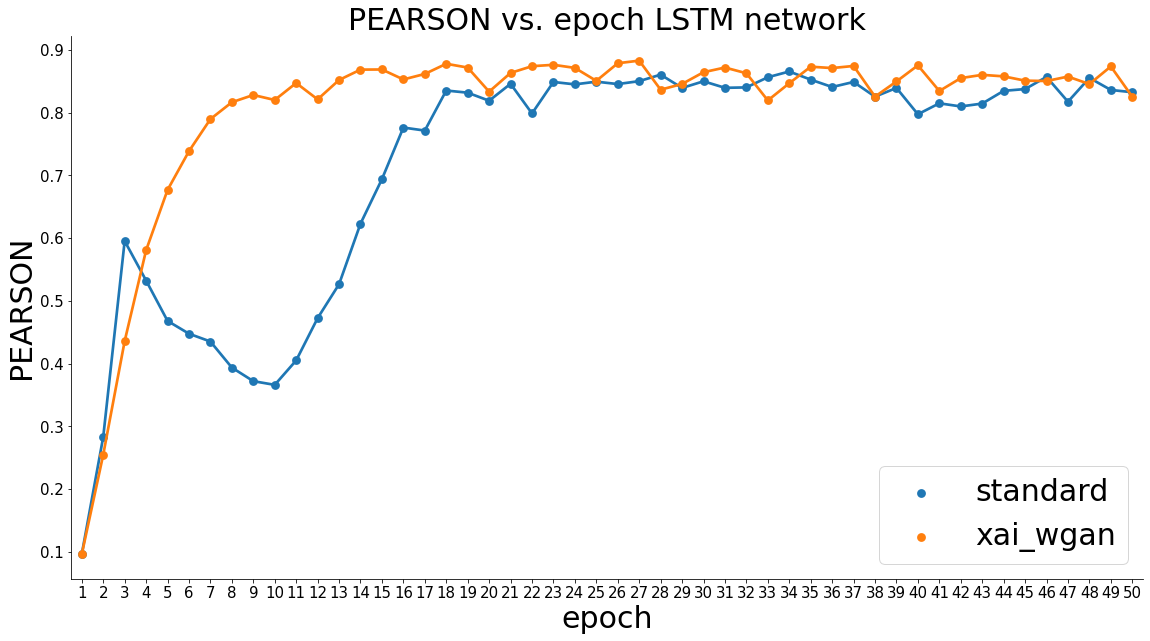

In [12]:
#sns.set_style("whitegrid")
g=sns.catplot(x="epoch", y="RMSE", hue='experiment', legend = False, data=dfm, kind='point', 
              ci=None, height=8.27, aspect=15.7/8.27)
g.ax.set_xlabel(xlabel = "epoch", fontsize=30)
g.ax.set_ylabel(ylabel = "PEARSON", fontsize=30)
g.ax.legend(fontsize=30)
g.ax.set_title("PEARSON vs. epoch LSTM network", fontsize=30)
g.ax.tick_params(labelsize=15)

In [11]:
os.chdir("/Users/alainamahalanabis/Documents/GAN_XAI/src/figures/")
g.figure.set_size_inches(20, 20)
g.figure.savefig('Pearson_LSTM.png')

In [18]:
#####CNN DTW PLOT

os.chdir("/Users/alainamahalanabis/Documents/GAN_XAI/src/results/ecg/ECGCNN_Normal")
dtw_normal_files = glob.glob('epoch_50_batch_7_dtw_*.csv')
dtw_normal = []
df = pd.DataFrame()
for file in dtw_normal_files:
    print(file)
    df[file] = pd.read_csv(file, header=None)
i = 1
for col in df.columns:
    df.rename(columns={col:"run " + str(i)}, inplace=True)
    i +=1
df['epoch'] = range(1,51)
dfm_standard = df.melt('epoch', var_name='cols', value_name='DTW')
dfm_standard['experiment'] = "standard"

os.chdir("/Users/alainamahalanabis/Documents/GAN_XAI/src/results/ecg/ECGCNN_Normal_wgan")
dtw_normal_files = glob.glob('epoch_50_batch_7_dtw_*.csv')
dtw_normal = []
df = pd.DataFrame()
for file in dtw_normal_files:
    print(file)
    df[file] = pd.read_csv(file, header=None)
i = 1
for col in df.columns:
    df.rename(columns={col:"run " + str(i)}, inplace=True)
    i +=1
df['epoch'] = range(1,51)
dfm_wgan = df.melt('epoch', var_name='cols', value_name='DTW')
dfm_wgan['experiment'] = "xai_wgan"
dfm = pd.concat([dfm_standard, dfm_wgan], axis=0)

epoch_50_batch_7_dtw_time1650423005.9961689.csv
epoch_50_batch_7_dtw_time1650423613.815327.csv
epoch_50_batch_7_dtw_time1650423688.5195332.csv
epoch_50_batch_7_dtw_time1650423581.3166482.csv
epoch_50_batch_7_dtw_time1650423611.3794875.csv
epoch_50_batch_7_dtw_time1650423511.6203868.csv
epoch_50_batch_7_dtw_time1650423448.8795178.csv
epoch_50_batch_7_dtw_time1650423581.996884.csv
epoch_50_batch_7_dtw_time1650423559.9909272.csv
epoch_50_batch_7_dtw_time1650423712.3095307.csv
epoch_50_batch_7_dtw_time1650827733.7659066.csv
epoch_50_batch_7_dtw_time1650827758.8085454.csv
epoch_50_batch_7_dtw_time1650827654.1324975.csv
epoch_50_batch_7_dtw_time1650827829.1133096.csv
epoch_50_batch_7_dtw_time1650827851.7799559.csv


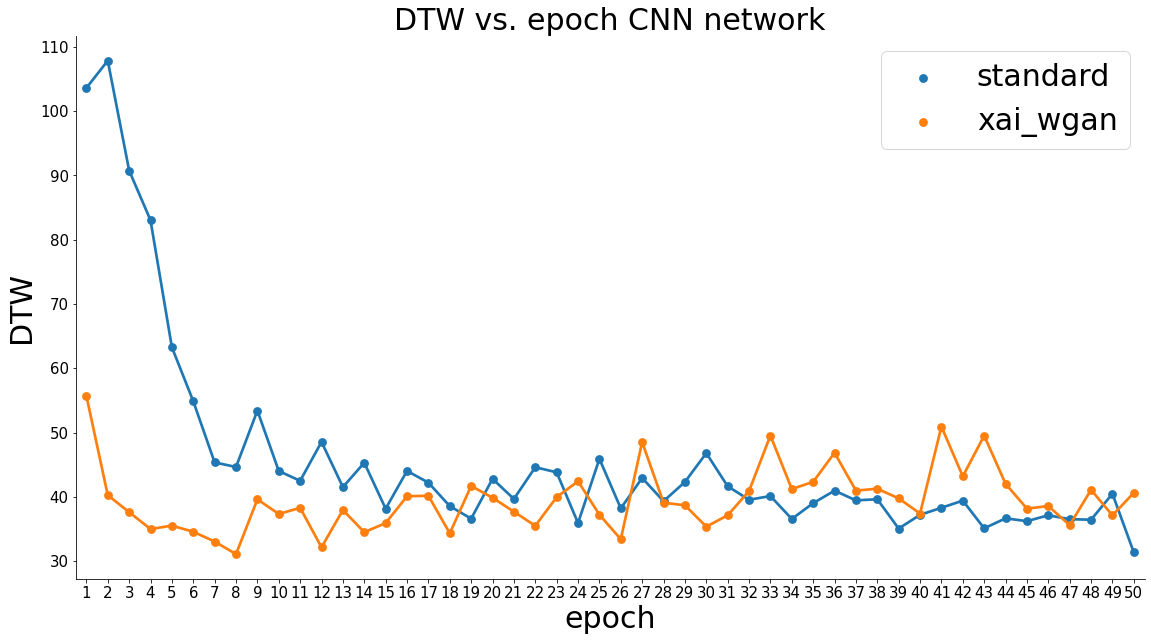

In [19]:
#sns.set_style("whitegrid")
g=sns.catplot(x="epoch", y="DTW", hue='experiment', legend = False, data=dfm, kind='point',
              ci=None, height=8.27, aspect=15.7/8.27)
g.ax.set_xlabel(xlabel = "epoch", fontsize=30)
g.ax.set_ylabel(ylabel = "DTW", fontsize=30)
g.ax.legend(fontsize=30)
g.ax.set_title("DTW vs. epoch CNN network", fontsize=30)
g.ax.tick_params(labelsize=15)

In [23]:
#####CNN PEARSON PLOT

os.chdir("/Users/alainamahalanabis/Documents/GAN_XAI/src/results/ecg/ECGCNN_Normal")
dtw_normal_files = glob.glob('epoch_50_batch_7_pearson_*.csv')
dtw_normal = []
df = pd.DataFrame()
for file in dtw_normal_files:
    print(file)
    df[file] = pd.read_csv(file, header=None)
i = 1
for col in df.columns:
    df.rename(columns={col:"run " + str(i)}, inplace=True)
    i +=1
df['epoch'] = range(1,51)
dfm_standard = df.melt('epoch', var_name='cols', value_name='DTW')
dfm_standard['experiment'] = "standard"

os.chdir("/Users/alainamahalanabis/Documents/GAN_XAI/src/results/ecg/ECGCNN_Normal_wgan")
dtw_normal_files = glob.glob('epoch_50_batch_7_pearson_*.csv')
dtw_normal = []
df = pd.DataFrame()
for file in dtw_normal_files:
    print(file)
    df[file] = pd.read_csv(file, header=None)
i = 1
for col in df.columns:
    df.rename(columns={col:"run " + str(i)}, inplace=True)
    i +=1
df['epoch'] = range(1,51)
dfm_wgan = df.melt('epoch', var_name='cols', value_name='DTW')
dfm_wgan['experiment'] = "xai_wgan"
dfm = pd.concat([dfm_standard, dfm_wgan], axis=0)

epoch_50_batch_7_pearson_time1650423614.1722615.csv
epoch_50_batch_7_pearson_time1650423006.167082.csv
epoch_50_batch_7_pearson_time1650423582.1539915.csv
epoch_50_batch_7_pearson_time1650423611.5979376.csv
epoch_50_batch_7_pearson_time1650423690.0291603.csv
epoch_50_batch_7_pearson_time1650423715.1450171.csv
epoch_50_batch_7_pearson_time1650423560.1763697.csv
epoch_50_batch_7_pearson_time1650423511.774594.csv
epoch_50_batch_7_pearson_time1650423581.5339096.csv
epoch_50_batch_7_pearson_time1650423449.156963.csv
epoch_50_batch_7_pearson_time1650827829.2511015.csv
epoch_50_batch_7_pearson_time1650827654.2784424.csv
epoch_50_batch_7_pearson_time1650827758.9565415.csv
epoch_50_batch_7_pearson_time1650827851.9353037.csv
epoch_50_batch_7_pearson_time1650827733.9543743.csv


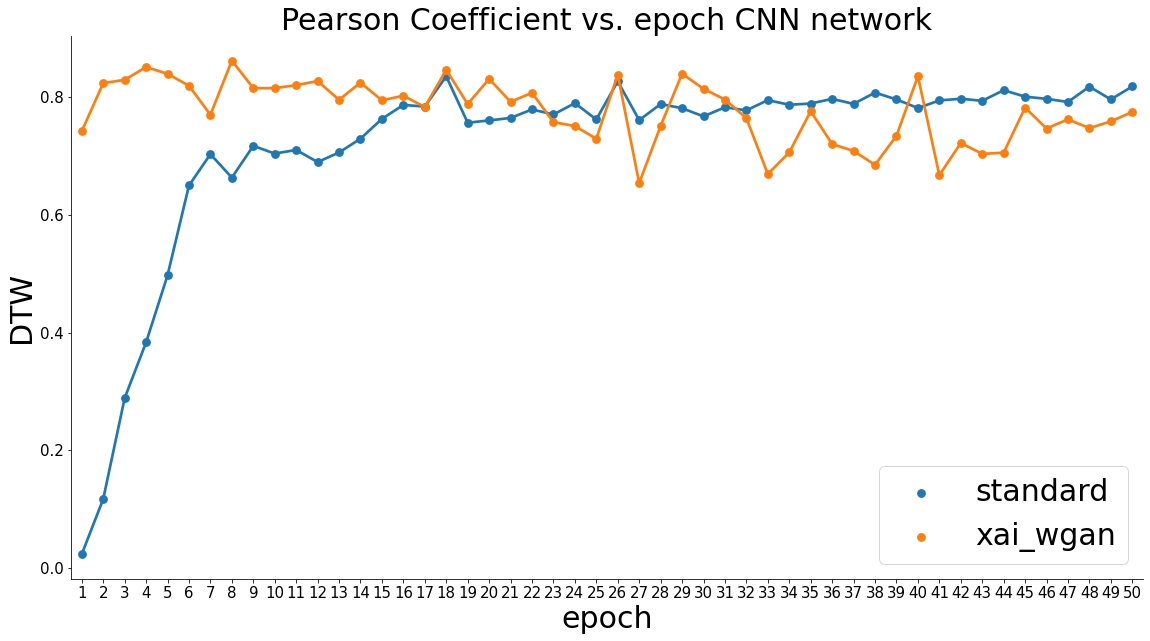

In [24]:
#sns.set_style("whitegrid")
g=sns.catplot(x="epoch", y="DTW", hue='experiment', legend = False, data=dfm, kind='point', 
              ci=None, height=8.27, aspect=15.7/8.27)
g.ax.set_xlabel(xlabel = "epoch", fontsize=30)
g.ax.set_ylabel(ylabel = "DTW", fontsize=30)
g.ax.legend(fontsize=30)
g.ax.set_title("Pearson Coefficient vs. epoch CNN network", fontsize=30)
g.ax.tick_params(labelsize=15)

In [34]:
os.chdir("/Users/alainamahalanabis/Documents/GAN_XAI/src/figures/")
g.figure.set_size_inches(20, 20)
g.figure.savefig('Pearson_CNN.png')

In [22]:
standard_gen_model_dir = "/Users/alainamahalanabis/Documents/GAN_XAI/src/results/ecg/ECGLSTM_Normal/generator.pt"
generator_standard = ECGLSTMGenerator()
generator_standard.load_state_dict(torch.load(standard_gen_model_dir), strict=False)
generator_standard.eval()
images_standard = generator_standard(torch.randn(5, 100))
images_standard = images_standard.detach().numpy()

wgan_gen_model_dir = "/Users/alainamahalanabis/Documents/GAN_XAI/src/results/ecg/ECGLSTM_Normal_wgan/generator.pt"
generator_wgan = ECGLSTMGenerator()
generator_wgan.load_state_dict(torch.load(wgan_gen_model_dir))
generator_wgan.eval()
images_wgan= generator_wgan(torch.randn(5, 100))
images_wgan= images_wgan.detach().numpy()

TypeError: __init__() missing 3 required positional arguments: 'xy', 'width', and 'height'

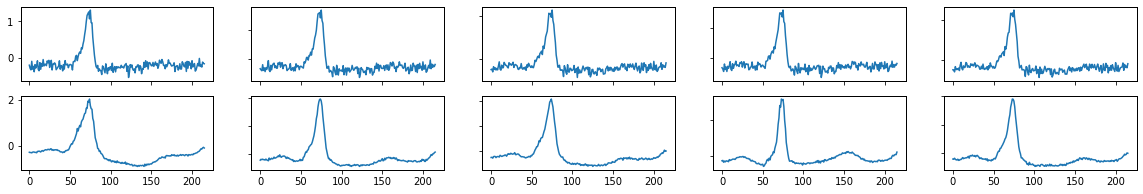

In [24]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.rcParams["figure.figsize"] = (20,3)

fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2,5)

ax1.plot(images_standard[0])
ax2.plot(images_standard[1])
ax3.plot(images_standard[2])
ax4.plot(images_standard[3])
ax5.plot(images_standard[4])

ax6.plot(images_wgan[0])
ax7.plot(images_wgan[1])
ax8.plot(images_wgan[2])
ax9.plot(images_wgan[3])
ax10.plot(images_wgan[4])


for ax in fig.get_axes():
    ax.label_outer()
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth('1')

ax.add_patch(patches.Rectangle())
plt.axis('off')
#fig.savefig('{}/epoch_{}_batch_{}_{}.png'.format(self.data_subdir, epoch, n_batch, time.time()))
plt.show()

In [35]:
standard_gen_model_dir = "/Users/alainamahalanabis/Documents/GAN_XAI/src/results/ecg/ECGCNN_Normal/generator.pt"
generator_standard = EcgCNNGenerator()
generator_standard.load_state_dict(torch.load(standard_gen_model_dir), strict=False)
generator_standard.eval()
images_standard = generator_standard(torch.randn(5, 100))
images_standard = images_standard.detach().numpy()

wgan_gen_model_dir = "/Users/alainamahalanabis/Documents/GAN_XAI/src/results/ecg/ECGCNN_Normal_wgan/generator.pt"
generator_wgan = EcgCNNGenerator()
generator_wgan.load_state_dict(torch.load(wgan_gen_model_dir), strict=False)
generator_wgan.eval()
images_wgan= generator_wgan(torch.randn(5, 100))
images_wgan= images_wgan.detach().numpy()

TypeError: __init__() missing 3 required positional arguments: 'xy', 'width', and 'height'

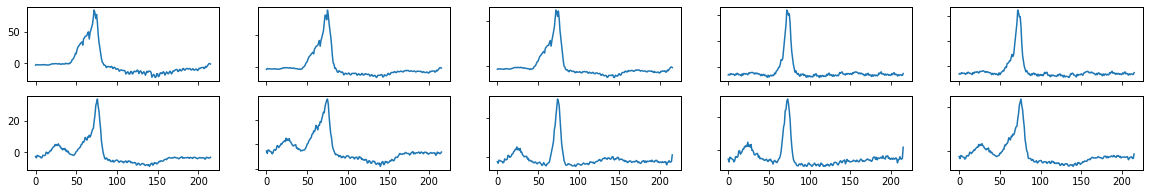

In [36]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.rcParams["figure.figsize"] = (20,3)

fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2,5)

ax1.plot(images_standard[0])
ax2.plot(images_standard[1])
ax3.plot(images_standard[2])
ax4.plot(images_standard[3])
ax5.plot(images_standard[4])

ax6.plot(images_wgan[0])
ax7.plot(images_wgan[1])
ax8.plot(images_wgan[2])
ax9.plot(images_wgan[3])
ax10.plot(images_wgan[4])


for ax in fig.get_axes():
    ax.label_outer()
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth('1')

ax.add_patch(patches.Rectangle())
plt.axis('off')
#fig.savefig('{}/epoch_{}_batch_{}_{}.png'.format(self.data_subdir, epoch, n_batch, time.time()))
plt.show()

In [471]:
os.chdir("/Users/alainamahalanabis/Documents/GAN_XAI/src/results/ecg/ECGCNNSaliencyF")
dtw_saliency_files = glob.glob('epoch_50_batch_7_dtw_*.csv')
dtw_saliency = []
df_saliency = pd.DataFrame()
for file in dtw_saliency_files:
    print(file)
    df_saliency[file] = pd.read_csv(file, header=None)
i = 1
for col in df_saliency.columns:
    df_saliency.rename(columns={col:"run " + str(i)}, inplace=True)
    i +=1
df_saliency['epoch'] = range(1,51)
dfm_saliency = df_saliency.melt('epoch', var_name='cols', value_name='DTW')
dfm_saliency['xAI'] = "saliency"

epoch_50_batch_7_dtw_time1639620968.211338.csv
epoch_50_batch_7_dtw_time1639623277.137475.csv
epoch_50_batch_7_dtw_time1639621114.6685653.csv
epoch_50_batch_7_dtw_time1639622985.0668316.csv
epoch_50_batch_7_dtw_time1639620827.5528662.csv


In [25]:
os.chdir("/Users/alainamahalanabis/Documents/GAN_XAI/src/results/ecg/ECGLSTM_no_wgan")
dtw_normal_files = glob.glob('time_*.txt')
dtw_normal = []
df = pd.DataFrame()
for file in dtw_normal_files:
    print(file)
    df[file] = pd.read_csv(file, header=None)
i = 1
for col in df.columns:
    df.rename(columns={col:"run " + str(i)}, inplace=True)
    i +=1
df['experiment'] = "standard"
dfm_lstm_standard = df.melt('experiment', var_name='cols', value_name='time')
dfm_lstm_standard['architecture'] = "LSTM"
#dfm_standard['experiment'] = "standard"

os.chdir("/Users/alainamahalanabis/Documents/GAN_XAI/src/results/ecg/ECGLSTM_wgan")
dtw_normal_files = glob.glob('time_*.txt')
dtw_normal = []
df = pd.DataFrame()
for file in dtw_normal_files:
    print(file)
    df[file] = pd.read_csv(file, header=None)
i = 1
for col in df.columns:
    df.rename(columns={col:"run " + str(i)}, inplace=True)
    i +=1
df['experiment'] = "wgan"
dfm_lstm_wgan = df.melt('experiment', var_name='cols', value_name='time')
dfm_lstm_wgan['architecture'] = "LSTM"

os.chdir("/Users/alainamahalanabis/Documents/GAN_XAI/src/results/ecg/ECGLSTM_Ig_alpha2_switchlast10")
dtw_normal_files = glob.glob('time_*.txt')
dtw_normal = []
df = pd.DataFrame()
for file in dtw_normal_files:
    print(file)
    df[file] = pd.read_csv(file, header=None)
i = 1
for col in df.columns:
    df.rename(columns={col:"run " + str(i)}, inplace=True)
    i +=1
df['experiment'] = "wgan_ig"
dfm_lstm_wgan = df.melt('experiment', var_name='cols', value_name='time')
dfm_lstm_wgan['architecture'] = "LSTM"

os.chdir("/Users/alainamahalanabis/Documents/GAN_XAI/src/results/ecg/ECGLSTM_adversary_alpha2_switchlast10")
dtw_normal_files = glob.glob('time_*.txt')
dtw_normal = []
df = pd.DataFrame()
for file in dtw_normal_files:
    print(file)
    df[file] = pd.read_csv(file, header=None)
i = 1
for col in df.columns:
    df.rename(columns={col:"run " + str(i)}, inplace=True)
    i +=1
df['experiment'] = "wgan_adversary"
dfm_lstm_wgan = df.melt('experiment', var_name='cols', value_name='time')
dfm_lstm_wgan['architecture'] = "LSTM"

os.chdir("/Users/alainamahalanabis/Documents/GAN_XAI/src/results/ecg/ECGCNN_no_wgan")
dtw_normal_files = glob.glob('time_*.txt')
dtw_normal = []
df = pd.DataFrame()
for file in dtw_normal_files:
    print(file)
    df[file] = pd.read_csv(file, header=None)
i = 1
for col in df.columns:
    df.rename(columns={col:"run " + str(i)}, inplace=True)
    i +=1
df['experiment'] = "standard"
dfm_CNN_standard = df.melt('experiment', var_name='cols', value_name='time')
dfm_CNN_standard['architecture'] = "CNN"

os.chdir("/Users/alainamahalanabis/Documents/GAN_XAI/src/results/ecg/ECGCNN_wgan")
dtw_normal_files = glob.glob('time_*.txt')
dtw_normal = []
df = pd.DataFrame()
for file in dtw_normal_files:
    print(file)
    df[file] = pd.read_csv(file, header=None)
i = 1
for col in df.columns:
    df.rename(columns={col:"run " + str(i)}, inplace=True)
    i +=1
df['experiment'] = "wgan"
dfm_CNN_wgan = df.melt('experiment', var_name='cols', value_name='time')
dfm_CNN_wgan['architecture'] = "CNN"

os.chdir("/Users/alainamahalanabis/Documents/GAN_XAI/src/results/ecg/ECGCNN_adversary_alpha20_switchlast10")
dtw_normal_files = glob.glob('time_*.txt')
dtw_normal = []
df = pd.DataFrame()
for file in dtw_normal_files:
    print(file)
    df[file] = pd.read_csv(file, header=None)
i = 1
for col in df.columns:
    df.rename(columns={col:"run " + str(i)}, inplace=True)
    i +=1
df['experiment'] = "wgan_adversary"
dfm_CNN_wgan_adversary = df.melt('experiment', var_name='cols', value_name='time')
dfm_CNN_wgan_adversary['architecture'] = "CNN"

os.chdir("/Users/alainamahalanabis/Documents/GAN_XAI/src/results/ecg/ECGCNN_Ig_alpha20_switchlast10")
dtw_normal_files = glob.glob('time_*.txt')
dtw_normal = []
df = pd.DataFrame()
for file in dtw_normal_files:
    print(file)
    df[file] = pd.read_csv(file, header=None)
i = 1
for col in df.columns:
    df.rename(columns={col:"run " + str(i)}, inplace=True)
    i +=1
df['experiment'] = "wgan_ig"
dfm_CNN_wgan_ig = df.melt('experiment', var_name='cols', value_name='time')
dfm_CNN_wgan_ig['architecture'] = "CNN"

os.chdir("/Users/alainamahalanabis/Documents/GAN_XAI/src/results/ecg/ECGCNN_Saliency_alpha20_switchlast10")
dtw_normal_files = glob.glob('time_*.txt')
dtw_normal = []
df = pd.DataFrame()
for file in dtw_normal_files:
    print(file)
    df[file] = pd.read_csv(file, header=None)
i = 1
for col in df.columns:
    df.rename(columns={col:"run " + str(i)}, inplace=True)
    i +=1
df['experiment'] = "wgan_saliency"
dfm_CNN_wgan_saliency = df.melt('experiment', var_name='cols', value_name='time')
dfm_CNN_wgan_saliency['architecture'] = "CNN"

dfm = pd.concat([dfm_lstm_standard, dfm_lstm_wgan, dfm_CNN_standard, dfm_CNN_wgan, dfm_CNN_wgan_adversary,
                 dfm_CNN_wgan_ig, dfm_CNN_wgan_saliency], axis=0)


time_148.70737671852112.txt
time_772.2730476856232.txt
time_6851.701108932495.txt
time_7004.229680776596.txt
time_6837.681905031204.txt
time_1282.0951778888702.txt
time_5634.051078081131.txt
time_6767.987769842148.txt
time_6948.345199108124.txt
time_5421.110785245895.txt
time_6932.022644042969.txt
time_1153.509038925171.txt
time_5881.004899740219.txt
time_5895.321288108826.txt
time_7008.44831776619.txt
time_6148.46750664711.txt
time_6280.5007383823395.txt
time_5833.2192902565.txt
time_6192.136892795563.txt
time_5818.819896221161.txt
time_6183.228090763092.txt
time_5831.315385103226.txt
time_6178.568730831146.txt
time_1562.7658178806305.txt
time_13413.474764585495.txt
time_14833.975036144257.txt
time_13653.781781435013.txt
time_13932.49130821228.txt
time_13970.008459091187.txt
time_13976.413907527924.txt
time_4120.844689130783.txt
time_3907.1939566135406.txt
time_13431.195279121399.txt
time_4129.014658689499.txt
time_13770.714662075043.txt
time_12655.959966421127.txt
time_13425.84199452

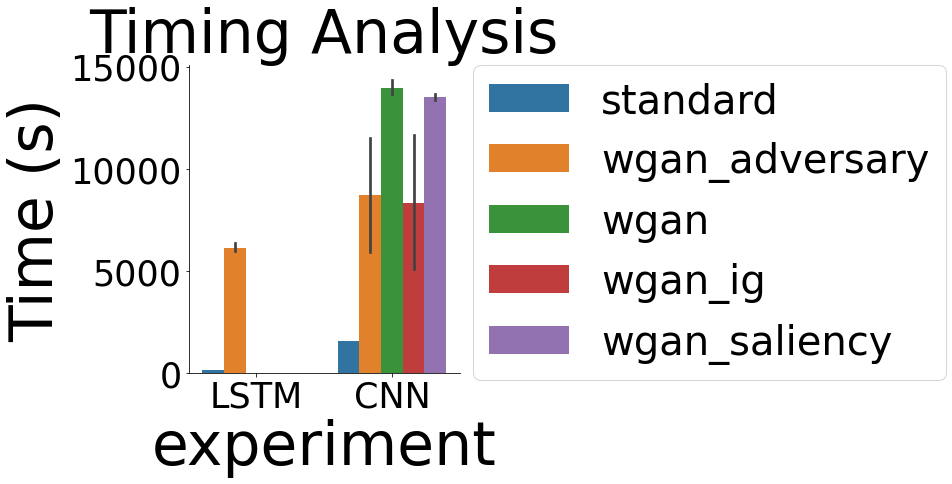

In [26]:
#sns.set_style("whitegrid")
g=sns.catplot(x="architecture", y="time", hue='experiment', data=dfm, kind='bar')
g.ax.set_xlabel(xlabel = "experiment", fontsize=60)
g.ax.set_ylabel(ylabel = "Time (s)", fontsize=60)
g._legend.remove()
#g.ax.legend(fontsize=30)
g.ax.set_title("Timing Analysis", fontsize=60)
g.ax.tick_params(labelsize=35)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=40)

In [13]:
os.chdir("/Users/alainamahalanabis/Documents/GAN_XAI/src/figures/")
g.figure.set_size_inches(40, 30)
g.figure.savefig('Timing.png')

In [27]:
torch.randint(0,2,(216,))

tensor([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
        0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
        0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
        1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1])